# **Car Price Analysis and Prediction**

### **Problem Statement**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### **Business Goal** 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [286]:
# import the neccessary libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Step 1: Reading and Understanding the Data**

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [287]:
cars = pd.read_csv('data/CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470.00


In [288]:
#cleanse and read the data dictionary file to better understand the fields we are working with
dict = pd.read_excel('data/Data Dictionary - carprices.xlsx')[
    ['Unnamed: 7','Unnamed: 11']].dropna().rename(
        columns={
            'Unnamed: 7': 'Field', 'Unnamed: 11': 'Description'}
            )
dict

,Field,Description
3,Car_ID,Unique id of each observation (Interger)
4,Symboling,"Its assigned insurance risk rating, A value of..."
5,carCompany,Name of car company (Categorical)
6,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,aspiration,Aspiration used in a car (Categorical)
8,doornumber,Number of doors in a car (Categorical)
9,carbody,body of car (Categorical)
10,drivewheel,type of drive wheel (Categorical)
11,enginelocation,Location of car engine (Categorical)
12,wheelbase,Weelbase of car (Numeric)


In [289]:
#get the statistics on the numerical variables to better understand the data's features
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.00,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.00,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.00,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.00,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.00,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.00,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.00,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.00,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.00,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.00,3.26,0.31,2.07,3.11,3.29,3.41,4.17


In [290]:
#check data types and if the dataset contains any null values
print("The number of missing values in the dataset is " + str(cars.isna().sum().sum())+"\n")

cars.info()

The number of missing values in the dataset is 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 

#### Inference:
- The dataset, referring to the Car Price dataset, contains 205 records (of cars) and 26 features
- The dataset contains a total of 10 categorical and 16 numerical variables, as shown above
- The dataset doesn't contain any missing values

### **Step 2 : Data Cleaning and Preprocessing**

##### Extract Brand Name
Though the brand name is useful, the rest of the car's name is not.
We'll extract the brand name from the variable `CarName`

In [291]:
brandName = [item.split(' ')[0] for item in cars['CarName']]
cars.insert(3, "brandName", brandName)
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,brandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


##### Modify cylindernumber to numerical
Although the variable `cylindernumber` is categorical, its has numerical characteristics. Thus, we will transform it to numerical.

In [292]:
#modify the cylindernumber's characteristics to numerical
cyl= []
for item in cars['cylindernumber']:
    if item == 'four': cyl.append(4)
    elif item == 'six': cyl.append(6)   
    elif item == 'five': cyl.append(5)
    elif item == 'eight': cyl.append(8)
    elif item == 'two': cyl.append(2)
    elif item == 'three': cyl.append(3)
    elif item == 'twelve': cyl.append(12)

cars['cylindernumber'] = cyl
cars['cylindernumber'].dtypes

dtype('int64')

In [293]:
cars.columns

Index(['car_ID', 'symboling', 'brandName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### **Step 3: Data Analysis and Visualization**

##### Analyze the distribution of car prices
- **Central Tendency Measures**: check if mean, median and mode are similar or significantly different. Differences between the mean and median may indicate outliers or skewness.
- **Skewness and Kurtosis**: Skewness measures the asymmetry of the distribution, while kurtosis indicates the peakedness or flatness of the distribution.
- **Percentiles and Outliers**: Helps to identify the price levels at specific points in the distribution and provides insights into the spread of prices across different ranges. 

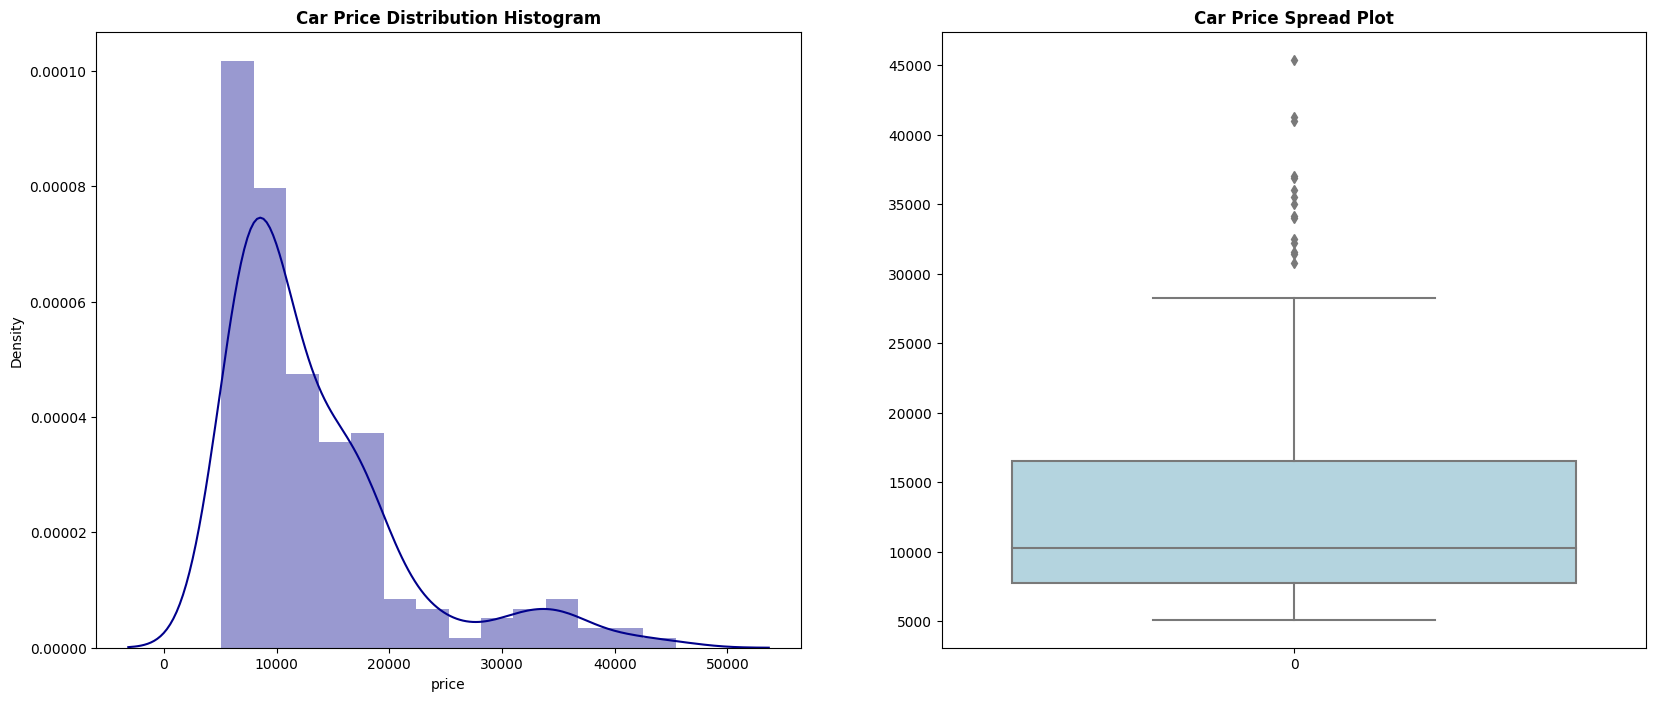

In [294]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution Histogram",fontweight='bold')
sns.distplot(cars.price, color='darkblue')

plt.subplot(1,2,2)
plt.title("Car Price Spread Plot",fontweight='bold')
sns.boxplot(cars.price, color='lightblue')

plt.show()

In [295]:
print(
    cars['price'].describe(
        percentiles = [0.25,0.5,0.75,0.85,0.9]).sort_values(
            ascending = False))

max     45400.00
90%     22563.00
85%     18500.00
75%     16503.00
mean    13276.71
50%     10295.00
std      7988.85
25%      7788.00
min      5118.00
count     205.00
Name: price, dtype: float64


#### Inference:
- **Central Tendency Measures**: the distribution of the plot appeared skewed to the right, indicating that the majority of prices in the dataset are low (below 17,000).
- **Skewness and Kurtosis**: the price distribution shows a high peak around the median and a noteworthy disparity between the mean and the median, with the value of the mean being larger than the median, suggesting positive-skewness.
- **Percentiles and Outliers**: the data points exhibit considerable dispersion from the mean, suggesting a significant variance in car prices. Specifically, 85% of prices fall below 18,500, while the remaining 15% are distributed between 18,500 and 45,400. Majority of the outliers are positive outliers.

#### Analyze the correlation between the numerical variables
- **Correlation between the features to the car price** (between the independent and the dependent variables): This correlation signifies the level of predictive capabilities of each feature on the car price
- **Correlation between the features themselves** (between 2 or more independent variables): This correlation signifies multicollinearity, which means that one independent variable can be predicted to a large extent from the other(s)

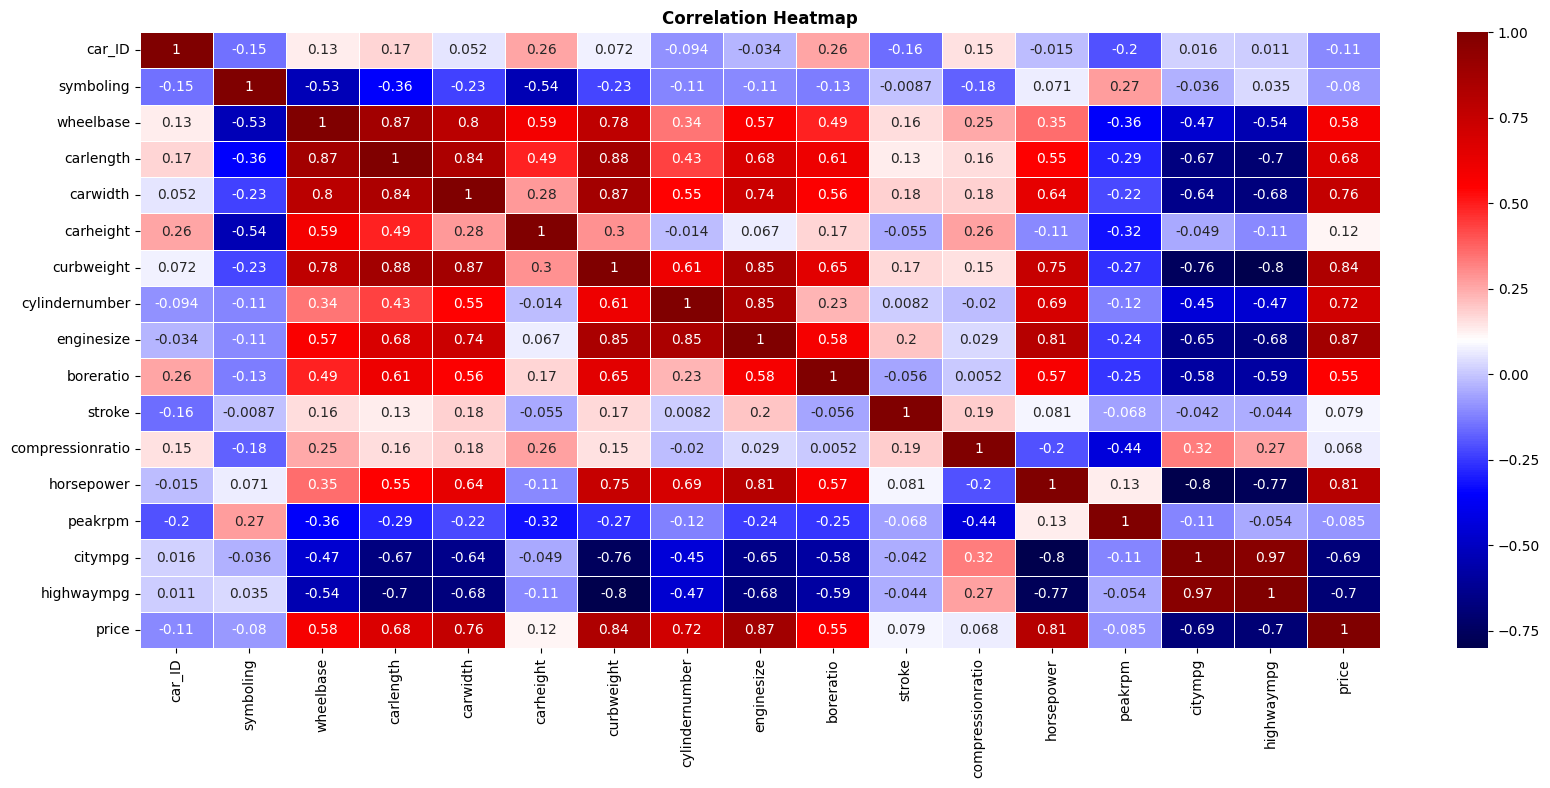

In [296]:
#plot the correlation matrix on a heatmap
correlation_matrix = cars.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight ='bold')
plt.show()

#### Inference:
- **Correlation between the features and the car price**: As shown in the heatmap, there are a significant number of numerical features with a high positive-correlation with price and a couple of numerical features with a high negative-correlation. <br><br> Those with high correlation, whether positive or negative, would have a higher predictive capabilities than those with lower correlation (closer to 0). <br><br>
- **Correlation between the features themselves**: There seems to be a certain number of independent variables that are positively-correlated with each other such as `horsepower`, `carlength`, `carwidth`, `curbweight`, `cylindernumber`, `enginesize`, `boreratio` and `wheelbase`. `highwaympg` and `citympg` seem to be positively-correlated with each other but negatively-correlated with most of the other features. <br><br> Such bundles of correlated features could pose problems of multicollinearity such as difficulties in interpretation, inflated standard errors, unstable model estimates, model overfitting and increased complexity.

#### Analyze the categorical variables
- **Frequency of each category**: if the dataset is overrepresented by a category of a feature, then the feature is imbalanced
- **Difference of price distribution between each category**

In [297]:
#list down all the categorical variables
for item in cars:
    if cars[item].dtypes == 'object':
        print(item)

brandName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
fuelsystem


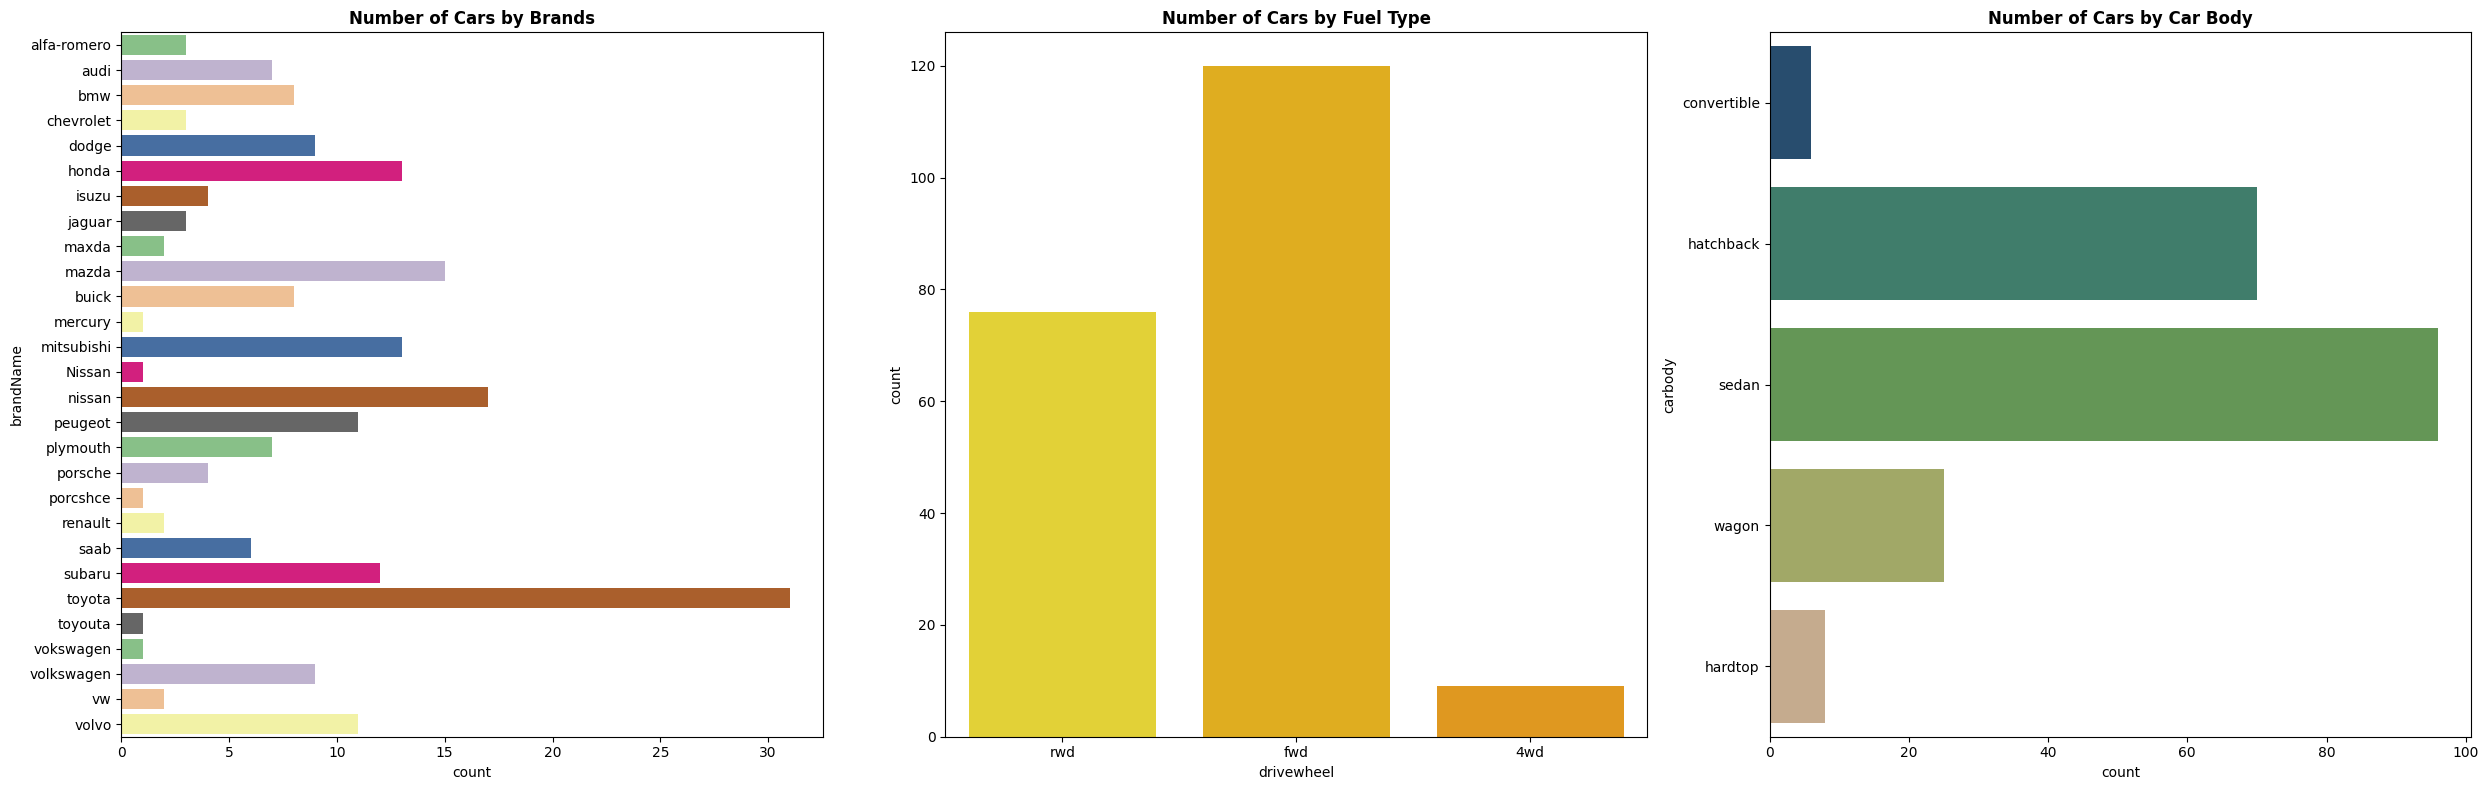

In [298]:
plt.figure(figsize=(25, 8))

plt.subplot(1,3,1)
sns.countplot(data = cars, y= 'brandName', palette='Accent' )
plt.title('Number of Cars by Brands', fontweight = 'bold')

plt.subplot(1,3,2)
sns.countplot(data = cars, x = 'drivewheel', palette= 'Wistia')
plt.title('Number of Cars by Fuel Type',fontweight = 'bold')

plt.subplot(1,3,3)
sns.countplot(data =cars, y = 'carbody', palette='gist_earth')
plt.title('Number of Cars by Car Body',fontweight = 'bold')

plt.tight_layout()
plt.show()

#### Inference:
- Toyota cars seems to be the most preferred car brand. Besides, we can also deduce that the car industry in America are mostly dominated by the East Asian car brands (Toyota, Nissan, Mazda, Honda, Mitsubishi). We can further split the brands into East Asian and Non-East Asian.
- FWD (forward wheel drive) are the most favored drivewheel amongst them.
- Sedans and hatchbacks are the two most dominating car body types by far compared to the rest.

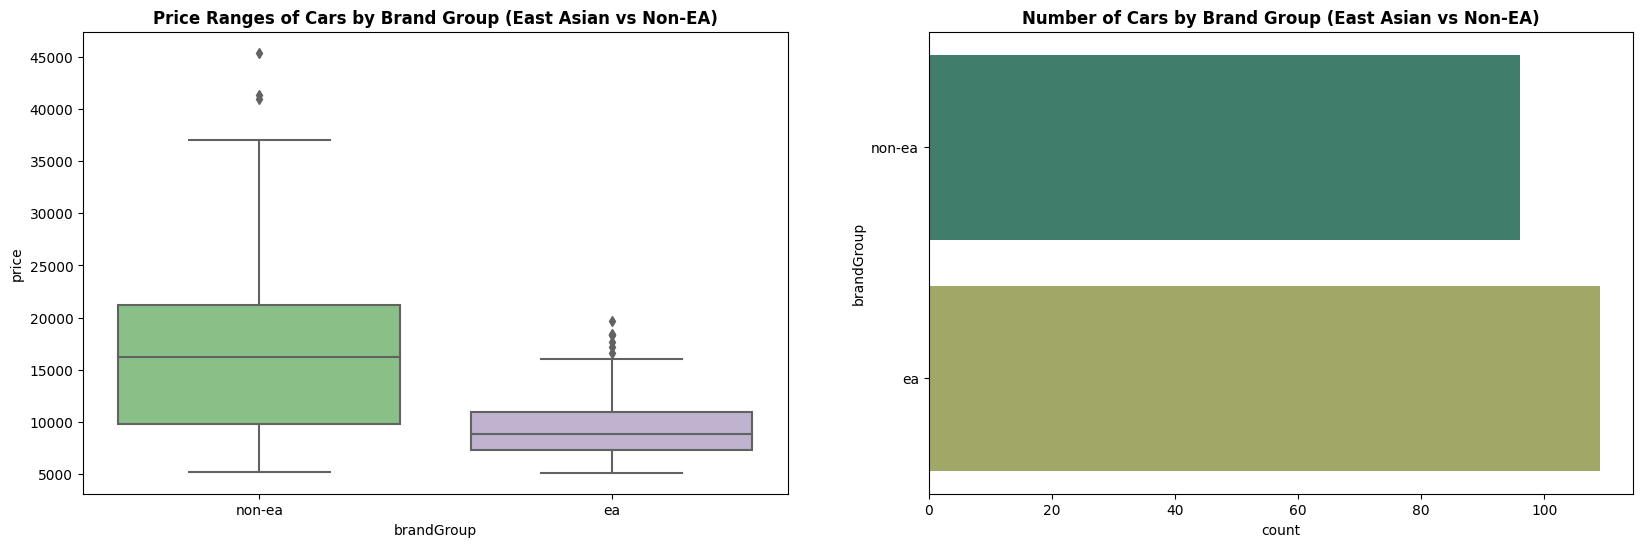

In [299]:
# let's compare East Asian brands to non-East Asian brands
brandgroup = []
for item in cars['brandName']:
    if item.lower() in ['toyota', 'toyouta', 'nissan', 'isuzu', 'honda', 'mitsubishi', 'mazda', 'maxda', 'subaru']:
        brandgroup.append('ea')
    else: brandgroup.append('non-ea')

cars.insert(3, 'brandGroup', brandgroup)
cars.drop(['brandName'],axis=True,inplace=True)

#plot the average prices of the different brand groups and the number of cars from each group
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x= cars['brandGroup'],y = cars['price'], palette='Accent' )
plt.title('Price Ranges of Cars by Brand Group (East Asian vs Non-EA)', fontweight = 'bold')

plt.subplot(1,2,2)
sns.countplot(data = cars, y = 'brandGroup', palette= 'gist_earth')
plt.title('Number of Cars by Brand Group (East Asian vs Non-EA)',fontweight = 'bold')

plt.show()

#### Inference:
- From the visualizations above, we found that, while the number of East Asians and Non-East Asian cars are relatively proportionate, Non-East Asian cars tend to have higher prices than their East Asian counterparts. By combining the brands into two groups (creating a new variable called "Car Brand Group"), East Asian and Non-East Asian, we have improve the predictive capabilities of the car brand categorical variable. 

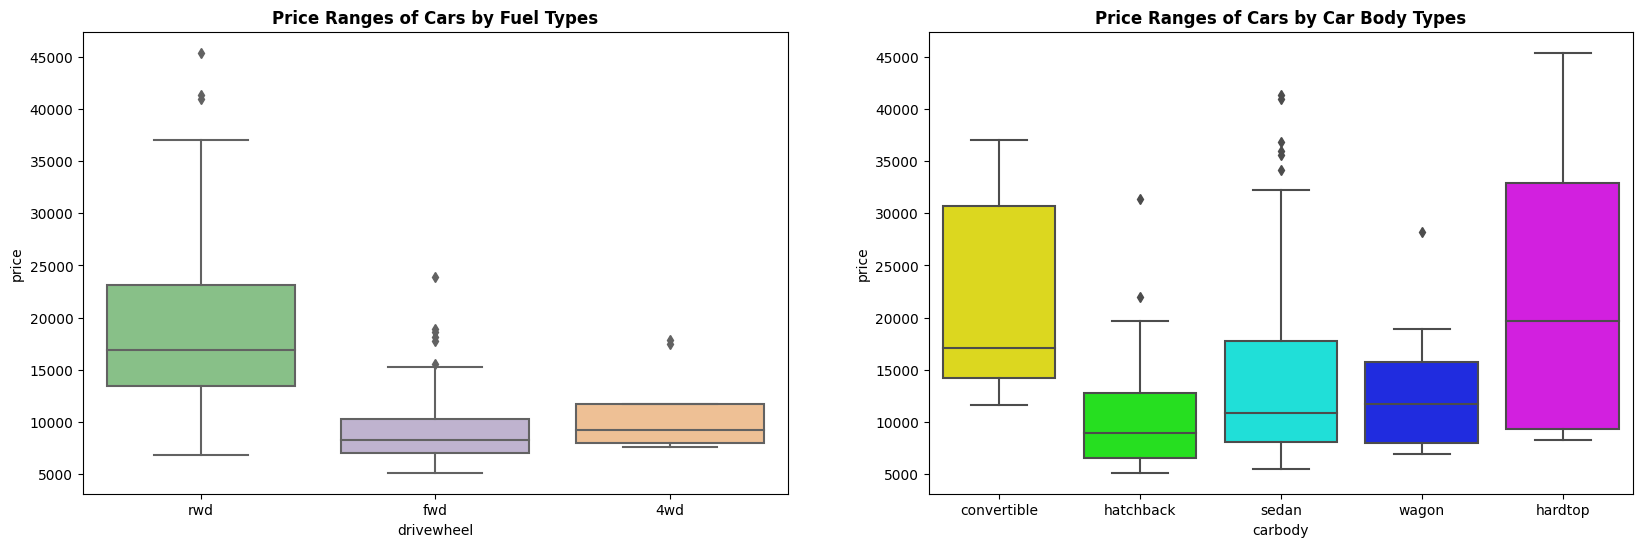

In [300]:
#plot the average prices of the different features and its variations
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x= cars['drivewheel'],y = cars['price'], palette='Accent' )
plt.title('Price Ranges of Cars by Fuel Types', fontweight = 'bold')

plt.subplot(1,2,2)
sns.boxplot(x= cars['carbody'],y = cars['price'], palette='hsv' )
plt.title('Price Ranges of Cars by Car Body Types', fontweight = 'bold')

plt.show()

#### Inference:
- Though fwd (forward wheel drive) are the most common drivewheel in the US market, the rwd (rear wheel drive) are shown to be the most pricy. The graph also points out that the difference in pricing between fwd and 4wd (all or 4 wheel drive) are not significant.
- While hatchbacks and sedans dominated the US car market in terms of numbers, the hatchbacks, sedans and wagons have lower average prices 
compared to the convertibles and hardtops.

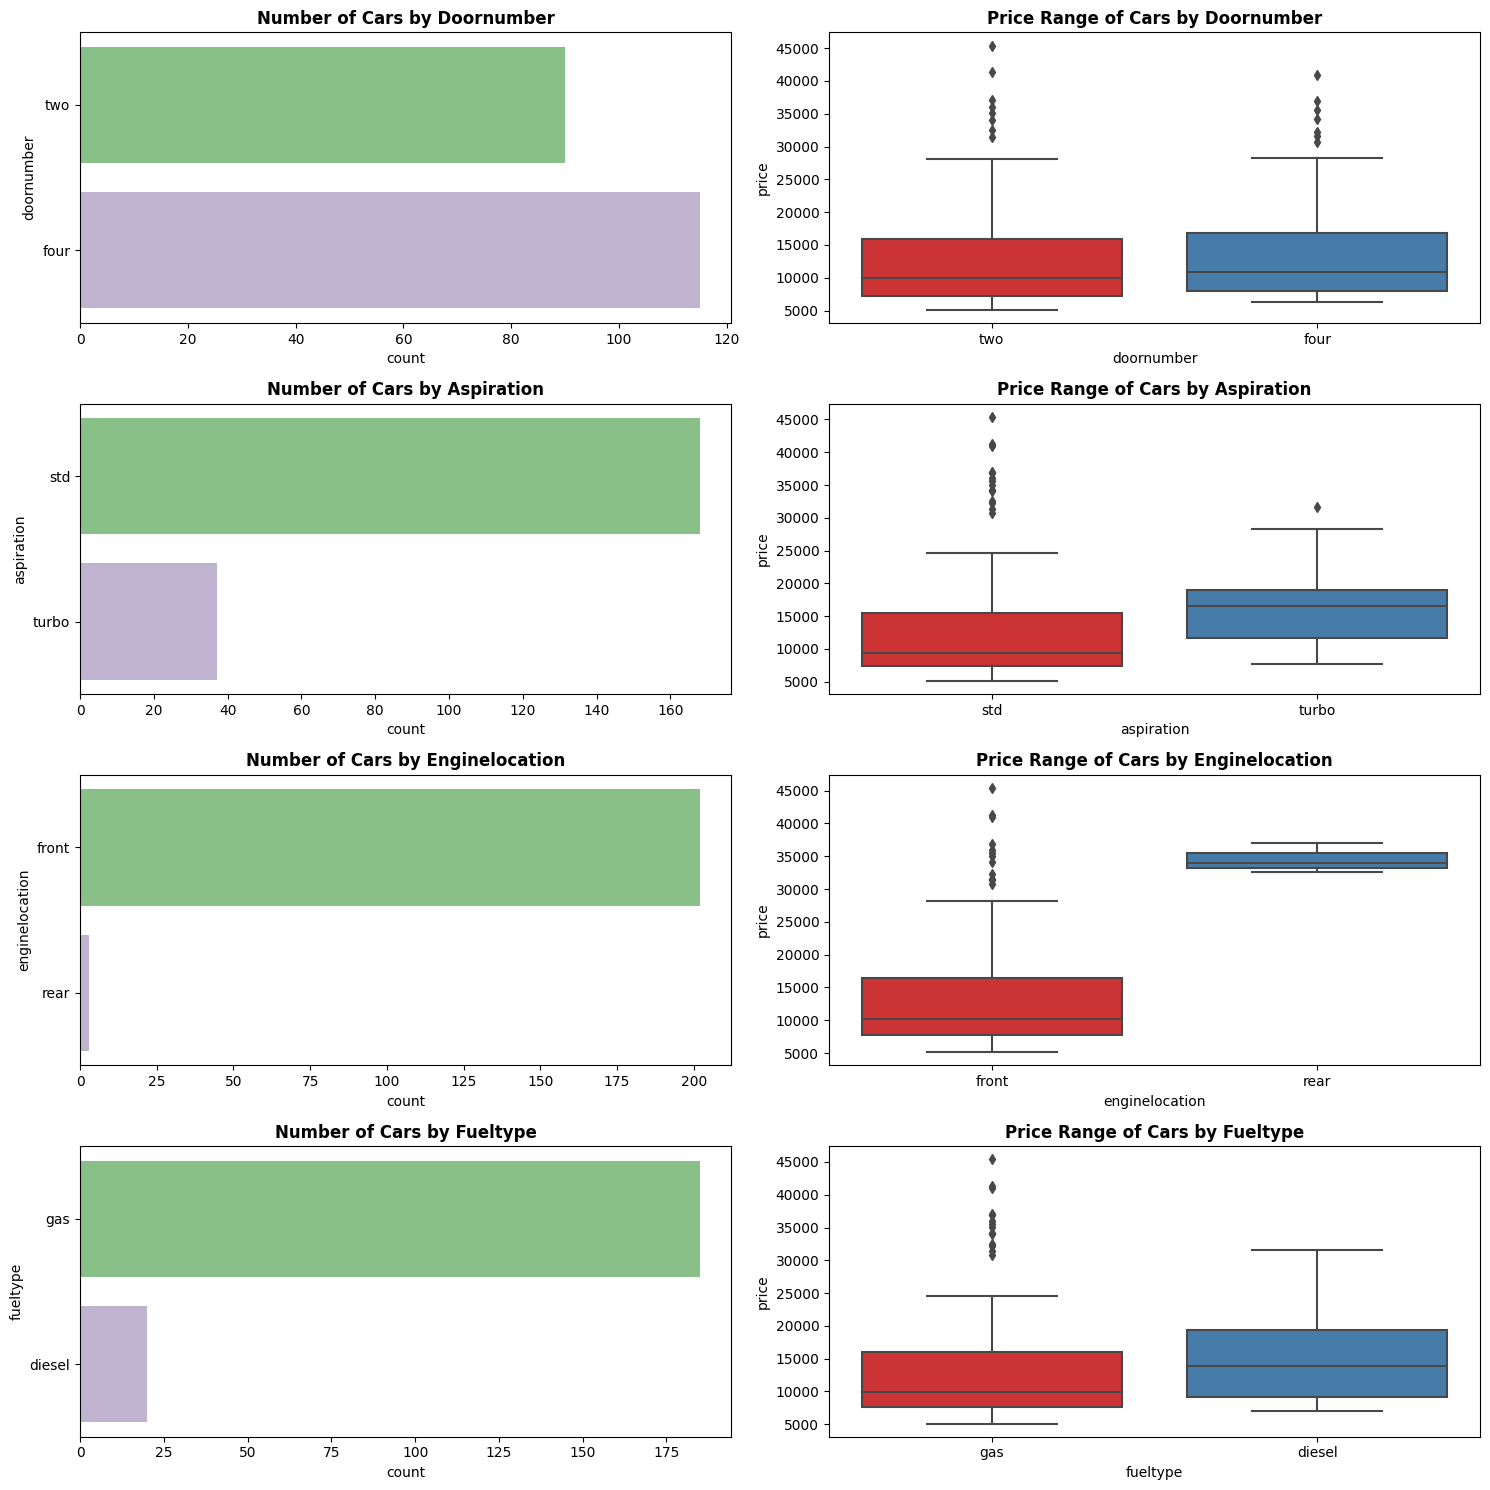

In [301]:
plt.figure(figsize=(15, 15))

def doubleplot(feature, figure, rows):
    plt.subplot(rows, 2, figure)
    sns.countplot(data = cars, y= feature, palette='Accent' )
    plt.title(f'Number of Cars by {feature.capitalize()}', fontweight = 'bold')

    plt.subplot(rows, 2, figure+1)
    sns.boxplot(x = cars[feature], y= cars['price'], palette='Set1' )
    plt.title(f'Price Range of Cars by {feature.capitalize()}', fontweight = 'bold')

doubleplot('doornumber',1, 4)
doubleplot('aspiration',3, 4)
doubleplot('enginelocation',5, 4)
doubleplot('fueltype',7, 4)

plt.tight_layout()
plt.show()

#### Inference:
- `doornumber` doesn't seem to have high predictive capabilities since the difference in prices between a 4-door and a 2-door car, on average, is not significant.
- While std cars are much more favored than turbo cars, turbo cars are 1.5x pricier on average. Although, there also seems to be a few std cars that are more highly priced than turbo cars (above $35,000).
- Despite being noticably more expensive than front-engined cars (~$35k to $10k on average), rear-engined cars are also much less common in the market place (up to 50 times different in numbers).
- Though gas is the much more preferred fuel type, diesel cars on average are priced at approximately 1.4 times the price of gasoline cars.

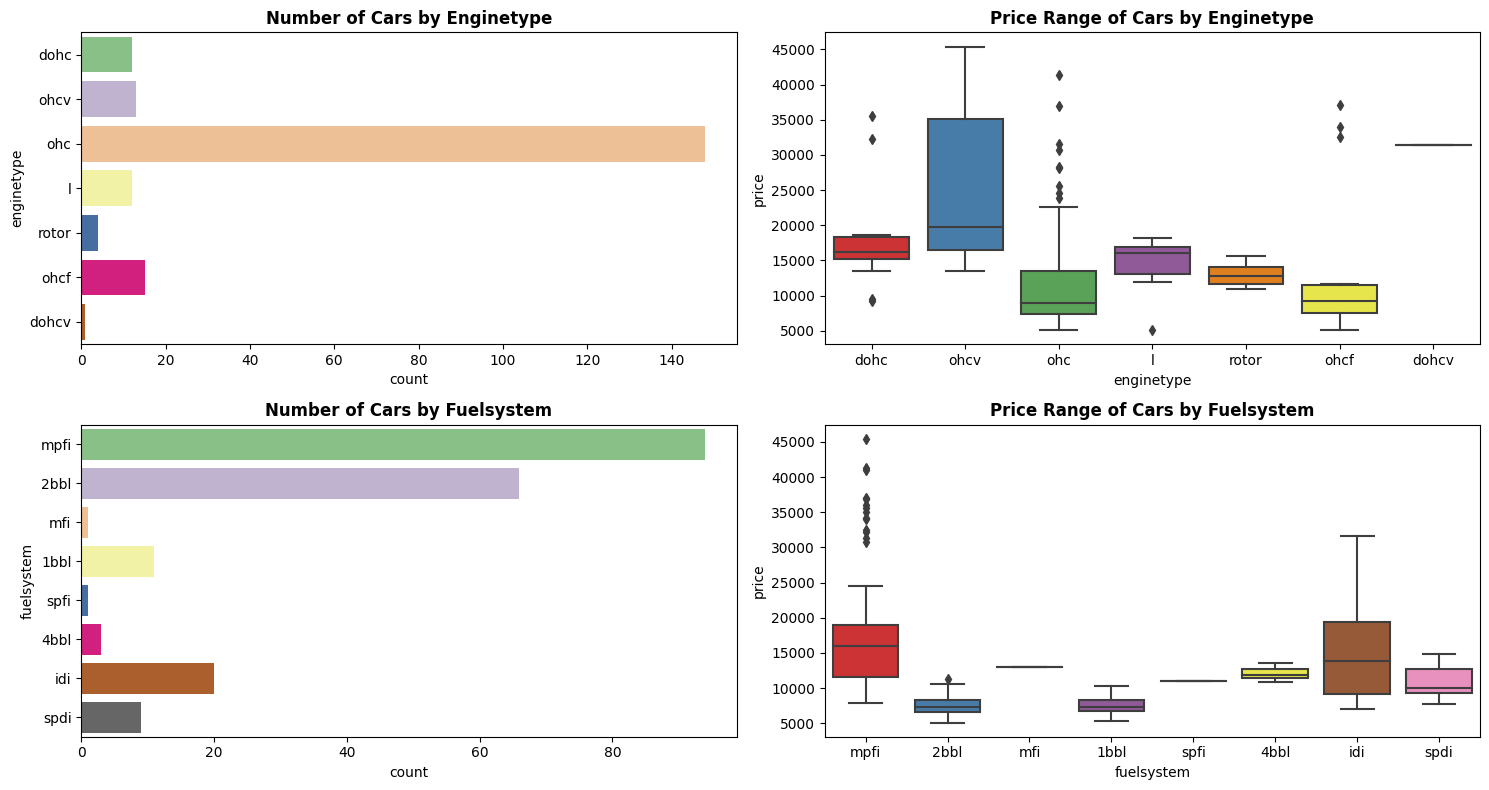

In [302]:
plt.figure(figsize=(15,8))

doubleplot('enginetype',1, 2)
doubleplot('fuelsystem',3, 2)

plt.tight_layout()
plt.show()

#### Inference:
- While the US Car market is heavily dominated by the "ohc"-engined cars, their pricing has shown to be inferior on average to cars with other engines. On the other hand, "ohcv"-engined cars tend to have higher prices on average, compared to the rest.
- As for `fuelsystem`, mpfi and 2bbl are the two most preferred ones, though, the car prices don't seem to be significantly affected by fuel systems.

#### Visualize the correlations between the numerical variables and the car price

In [303]:
#list down all the numerical variables
for item in cars:
    if cars[item].dtypes != 'object':
        print(item)

car_ID
symboling
wheelbase
carlength
carwidth
carheight
curbweight
cylindernumber
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


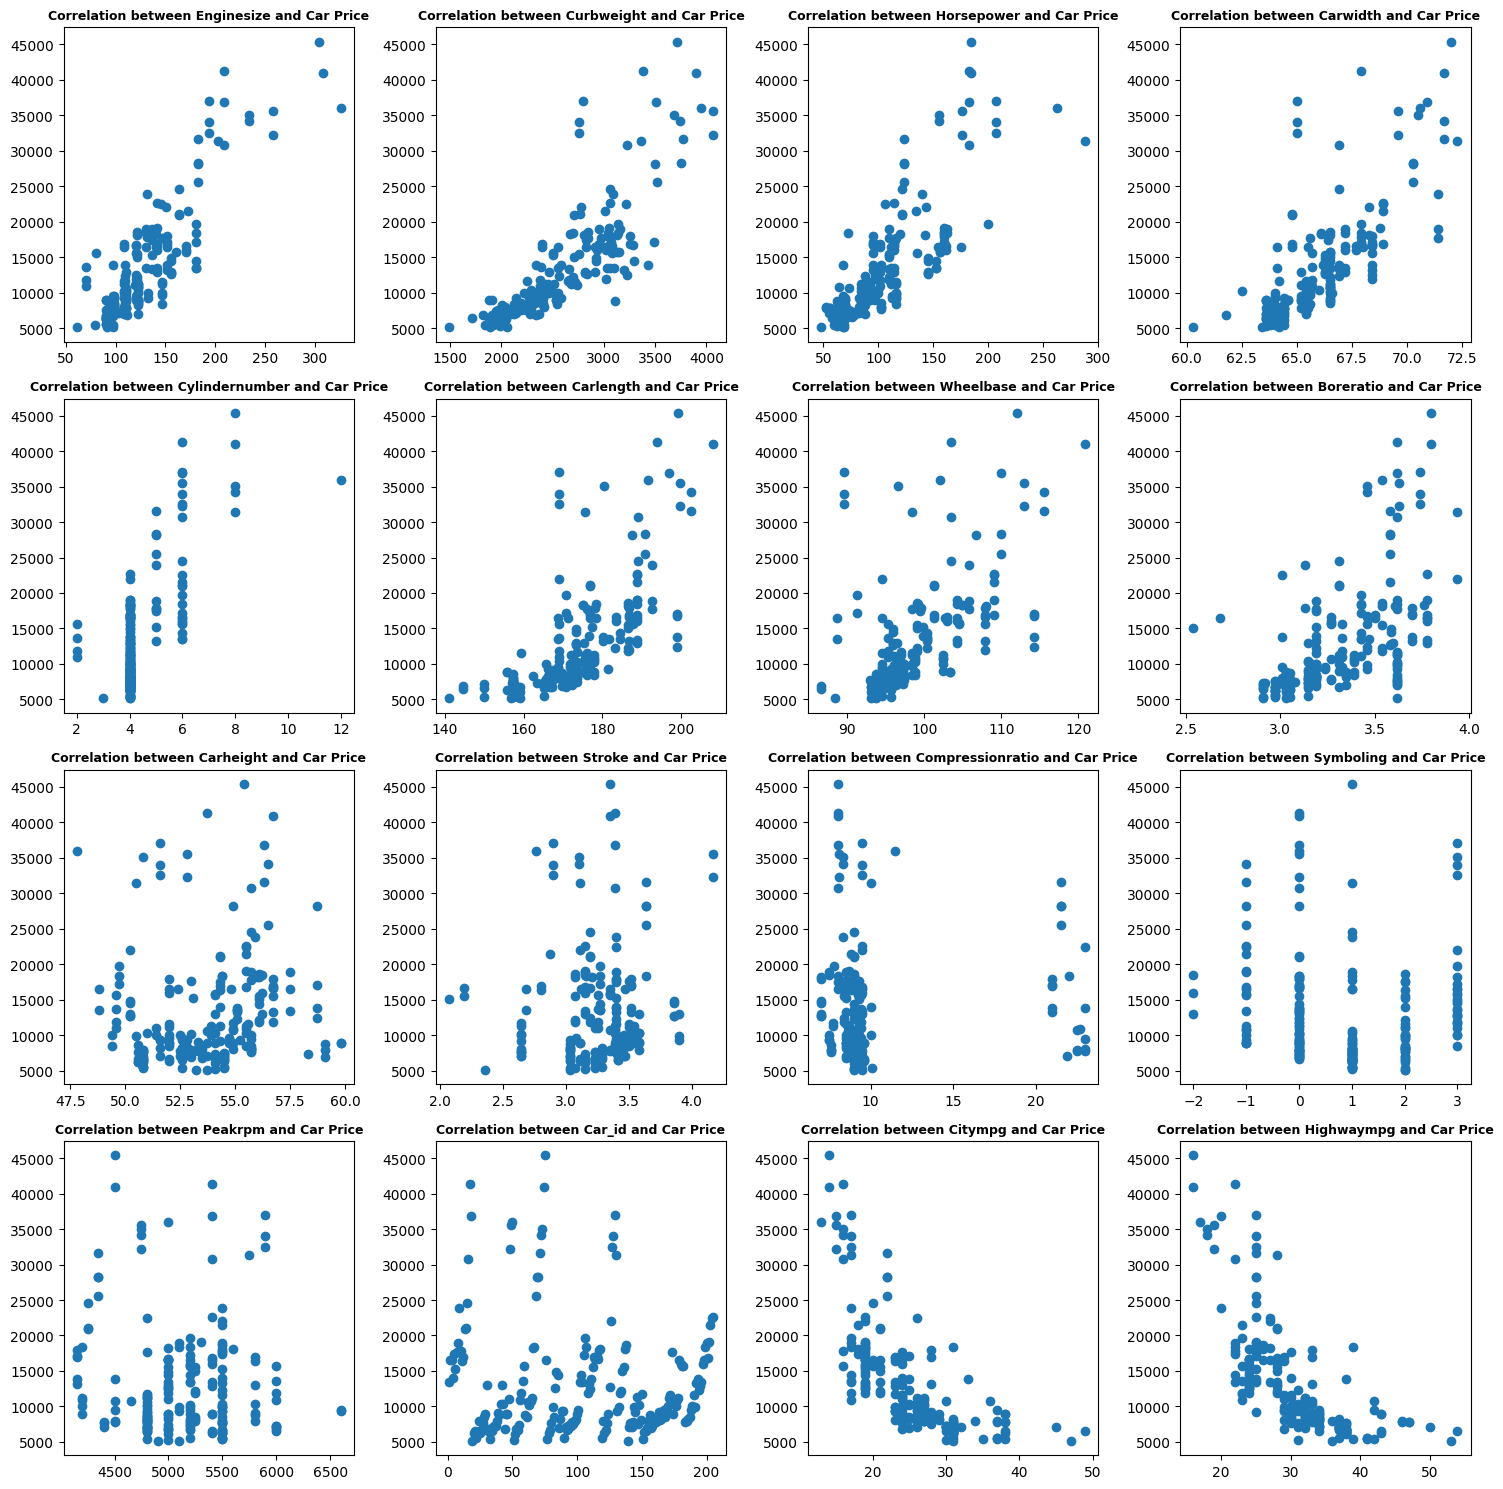

In [304]:
#plot the numerical variables in the order of correlation coefficient, in descending order
corr = correlation_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(15,15))

x= -1
for item in corr.index:
    x += 1 
    if item != 'price':
        plt.subplot(4,4,x)
        plt.scatter(cars[item], cars['price'])
        plt.title(f'Correlation between {item.capitalize()} and Car Price', fontsize = 9, fontweight = 'bold')

plt.tight_layout()
plt.show()

#### Inference:
- As shown above, `enginesize` seems to be the most positively-correlated feature with car price. You may also noiced that as features become less correlated to car price, their scatterplots also become less linear in relative to car price

### **Step 4: Feature Engineering, Selections and Data Preparations**

#### Create Dummy Variables for Categorical Features
We will create new binary variables that will replace the existing categorical variables to fit into the regression models

In [305]:
for item in cars:
    if cars[item].dtypes == 'object':
        print(item)

brandGroup
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
fuelsystem


In [306]:
# create dummy variables and then drop the previous categorical variables
def createDummyVariables(data, column):
    for i in range(0,len(data[column].unique())-1):
        item  = data[column].unique()[i]
        pts = []
        for point in data[column]:
            if point == item:
                pts.append(1)
            else: pts.append(0)
        data['is'+item.capitalize()] = pts

for item in cars:
    if cars[item].dtypes == 'object':
        createDummyVariables(cars, item)

for item in cars:
    if cars[item].dtypes == 'object':
        cars.drop([item], axis =True, inplace=True)

# we can also drop carID since it's not describing any feature about the individual cars
cars.drop (['car_ID'],axis=True, inplace=True)

cars

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,isL,isRotor,isOhcf,isMpfi,is2bbl,isMfi,is1bbl,isSpfi,is4bbl,isIdi
0,3,88.60,168.80,64.10,48.80,2548,4,130,3.47,2.68,...,0,0,0,1,0,0,0,0,0,0
1,3,88.60,168.80,64.10,48.80,2548,4,130,3.47,2.68,...,0,0,0,1,0,0,0,0,0,0
2,1,94.50,171.20,65.50,52.40,2823,6,152,2.68,3.47,...,0,0,0,1,0,0,0,0,0,0
3,2,99.80,176.60,66.20,54.30,2337,4,109,3.19,3.40,...,0,0,0,1,0,0,0,0,0,0
4,2,99.40,176.60,66.40,54.30,2824,5,136,3.19,3.40,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.10,188.80,68.90,55.50,2952,4,141,3.78,3.15,...,0,0,0,1,0,0,0,0,0,0
201,-1,109.10,188.80,68.80,55.50,3049,4,141,3.78,3.15,...,0,0,0,1,0,0,0,0,0,0
202,-1,109.10,188.80,68.90,55.50,3012,6,173,3.58,2.87,...,0,0,0,1,0,0,0,0,0,0
203,-1,109.10,188.80,68.90,55.50,3217,6,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,1


#### Analyze the correlation of the newly created dummy variables to the car price

Since, we have conducted some analysis on the characteristics of the categorical variables earlier, the correlation matrix of their dummy variables should also reflect those analysis.

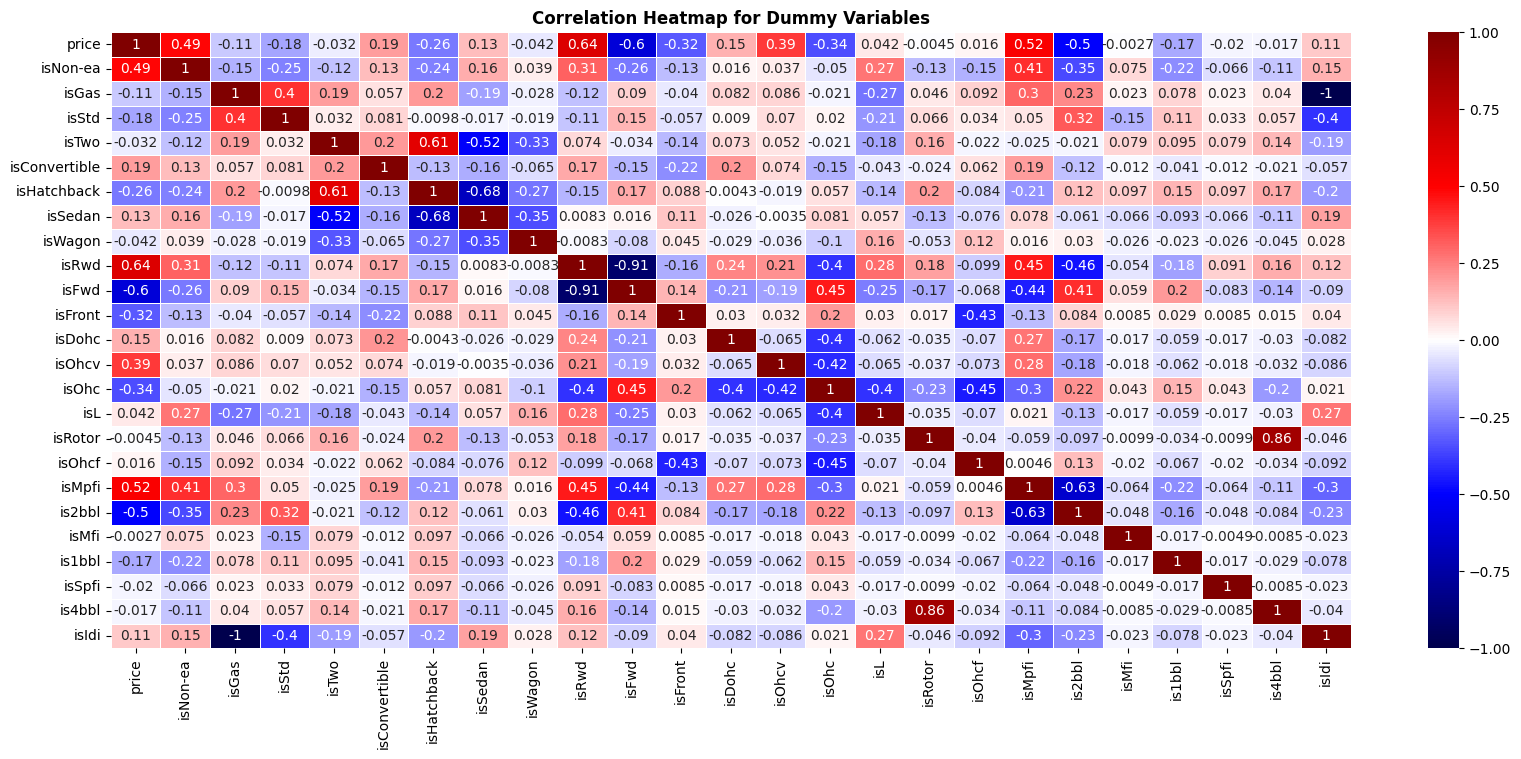

In [307]:
target_variables= [item for item in cars if item[0:2]=='is' or item =='price']
correlation_matrix = cars[target_variables].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5)
plt.title("Correlation Heatmap for Dummy Variables", fontweight ='bold')
plt.show()

#### Inference:
- From the correlation heatmap, we can deduced that `brandGroup` and `price` have an r-squared of about 0.5, signifying a moderately high correlation. In simpler terms, 50% of the car price will be affected by whether the brand is East-Asian or otherwise.
- We can also point out that there are a few other variables with moderately high positive and/or negative correlation with car price such as `isRwd`, `isFwd`, `isMpfi`, `is2bbl`, all with equal or above 0.5 in absolute r-squared.

### **Step 5: Develop and Test the Models**

#### Split the data to training and testing sets
Training and testing sets split will be 80% and 20% of the whole dataset respectively. We will also perform z-score scaling scale the features so that the values has a mean of 0 and a standard deviation of 1. Scaling helps to prevent some features from dominating or having undue influence on the model training process.

In [308]:
from sklearn.model_selection import train_test_split
X = cars[[item for item in cars if item != 'price']]
y = cars['price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=122)

In [309]:
# develop a function that generates the coefficients of features from a model
def get_feature_coefficents(X, model):
    feature_values = []
    feature_lists= []
    
    for i in range(0, len(X.columns)):
        if  abs(model.coef_[i]) > 0:
            feature_values.append(model.coef_[i])
            feature_lists.append(X.columns[i])

    features =pd.DataFrame()
    features['Feature'] = feature_lists
    features['Coefficients'] = feature_values

    return pd.DataFrame(features)

#disable scientific notations
pd.set_option('display.float_format', '{:.2f}'.format)


#### Develop a simple "Least Squares" Linear Regression model

In [310]:
# import the linear regression package
from sklearn.linear_model import LinearRegression as lr

# create linear regression object
reg = lr()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Regression Coefficients: \n', get_feature_coefficents(X, reg) , '\n')

# calculate the 10-fold cross validation score of the model. 
# the k-fold cross validation score determines the model predictive capabilities across different training sets
from sklearn.model_selection import cross_val_score
print('Cross Validaton Score: ', cross_val_score(reg, X_train, y_train, cv=10).mean())
 
# calculate coefficient of determination or r-squared. An r-squared of 1 means perfect prediction
print('Coefficient of Determination or R-Squared: {}'.format(reg.score(X_test, y_test)),'\n')

Regression Coefficients: 
              Feature  Coefficients
0          symboling        543.08
1          wheelbase       1045.44
2          carlength       -300.54
3           carwidth       1232.46
4          carheight        564.68
5         curbweight       1283.34
6     cylindernumber       1284.63
7         enginesize       4603.76
8          boreratio       -484.87
9             stroke      -1215.54
10  compressionratio      -8438.06
11        horsepower         79.22
12           peakrpm        911.12
13           citympg        -79.94
14        highwaympg        755.61
15          isNon-ea        383.19
16             isGas      -4608.70
17             isStd       -439.91
18             isTwo       -139.59
19     isConvertible        413.99
20       isHatchback       -560.68
21           isSedan       -141.07
22           isWagon       -661.30
23             isRwd       1196.50
24             isFwd        146.24
25           isFront      -1207.20
26            isDohc        

#### Results and Take Aways:

- From the results of the predictions, we have obtain an R-squared value of 0.83 for an "Ordinary Least Squares" linear regression model means that approximately 83% of the variability in car prices can be explained by the independent variables (features) included in the model.
<br><br>
- With a cross validation r-squared score of 0.73, we can also conclude that the linear regression generalizes well (but not great) into different datasets.
<br><br>
- Though the model performance is acceptable, there seems to be too many features in the prediction, creating complexity in the model. We can still make improvements on the current performance whilst reducing the number of features the model has. 

--> *We will use the Lasso Regression model to reduce the model's complexity and improve its performance.*

#### Develop a Lasso Regression Model that reduces model's complexity through regularization

In [311]:
# import the lasso regression package
from sklearn.linear_model import Lasso as ls

# create lasso regression object
reg = ls(alpha= 310)
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Regression Coefficients: \n', get_feature_coefficents(X, reg) , '\n')

# calculate the 10-fold cross validation score of the model. 
# the k-fold cross validation score determines the model predictive capabilities across different training sets
from sklearn.model_selection import cross_val_score
print('Cross Validaton Score: ', cross_val_score(reg, X_train, y_train, cv=10).mean())
 
# calculate coefficient of determination or r-squared. An r-squared of 1 means perfect prediction
print('Coefficient of Determination or R-Squared: {}'.format(reg.score(X_test, y_test)),'\n')

Regression Coefficients: 
           Feature  Coefficients
0       wheelbase        106.15
1        carwidth       1507.65
2      curbweight        412.91
3      enginesize       3381.55
4      horsepower       1044.37
5        isNon-ea        939.87
6   isConvertible         68.27
7         isSedan        172.91
8         isWagon        -94.75
9           isRwd        429.37
10          isFwd       -687.53
11        isFront      -1105.95
12         isOhcv       -152.87
13            isL       -584.75
14        isRotor        298.65
15          isMfi        -47.64 

Cross Validaton Score:  0.8005372472522672
Coefficient of Determination or R-Squared: 0.8702701040371826 



#### Results:
- From this Lasso Regression, we have noticed improvements in the performance of the model with far fewer features, 16, in the model compared to the "Ordinary Least Squares" Linear Regression model's 39 features.

- An R-squared value of 0.87  means that approximately 87% of the variability in car prices can be explained by the independent variables (features) included in the Lasso Regression model compared to 84% in the OLS Linear Regression model.

- With a cross validation r-squared score of 0.80, the Lasso Regression model generalizes even better than the OLS Linear Regression model, signifying its predictive capibilities to work well even with different datasets.

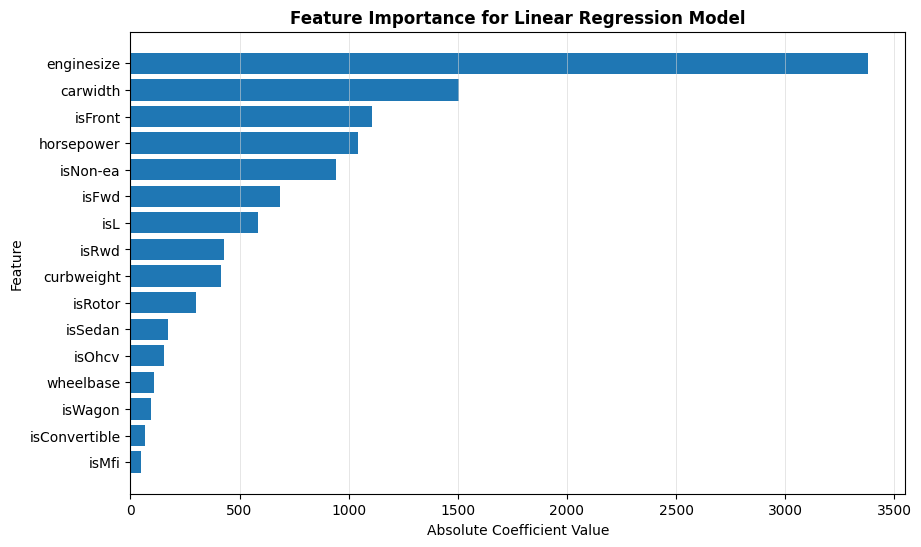

In [312]:
# Get the absolute values of the coefficients and their corresponding feature names
coefficients = np.abs(get_feature_coefficents(X, reg).Coefficients)
feature_names = list(X[get_feature_coefficents(X, reg).Feature].columns)

# Sort the coefficients and feature names in descending order
sorted_indices = np.argsort(coefficients)[::1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a horizontal bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.grid(True, axis='x', color = "lightgrey", linewidth = "0.4")
plt.barh(range(len(sorted_feature_names)), sorted_coefficients)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression Model', fontweight = 'bold')
plt.show()

### **Answering the business problem**

Based on the analysis above, below are the 10 most significant features in predicting car price and their impact on the price of the car respectively: 
- `enginesize` : 3381.55
- `carwidth` : 1507.65
- `isFront` : 1105.95
- `horsepower` : 1044.37
- `isNon-ea` : 939.87
- `isFwd` : 687.53
- `isL` : 584.75
- `isRwd` : 429.37
- `curbweight` : 412.91
- `isRotor` : 298.65
- `isSedan` : 172.91
- `isOhcv` : 152.87
- `wheelbase` : 106.15
- `isWagon` : 94.75
- `isConvertible` : 68.27
- `isMfi` : 47.64